In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/NOK.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date  Open  High   Low  Close  Adj Close    Volume
0  2018-12-12  5.95  6.06  5.93   6.04   5.592633  48348500
1  2018-12-13  5.98  6.05  5.97   6.03   5.583373  31790800
2  2018-12-14  5.91  6.01  5.89   5.94   5.500039  17796500
3  2018-12-17  5.94  5.95  5.85   5.87   5.435223  26578100
4  2018-12-18  5.88  5.90  5.76   5.78   5.351890  19722400


In [69]:
# 2.  chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [70]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 0.1}
Best score: 0.0036248073550668885


In [71]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([4.09022939, 4.150017  , 4.19972922, 4.24935049, 4.18979436,
       4.13010456, 4.06027698, 3.99022512, 4.02027603, 4.09022939,
       4.13010456, 4.13010456, 4.14006282, 4.22951228, 4.15996717,
       4.11017553, 4.13010456, 4.14006282, 4.17985578, 4.25926469,
       4.31868643, 3.94004095, 3.85947773, 3.88972843, 3.9098691 ,
       3.9098691 , 3.92998885, 3.91993158, 3.94004095, 3.92998885,
       3.9098691 , 3.91993158, 3.9098691 , 3.9098691 , 3.89980139,
       3.85947773, 3.9098691 , 3.89980139, 3.85947773, 3.88972843,
       3.95008791, 3.8493835 , 3.8493835 , 3.80895282, 3.76843577,
       3.79883167, 3.77857315, 3.79883167, 3.82917893, 3.78870511,
       3.78870511, 3.76843577, 3.80895282, 3.91993158, 3.95008791,
       3.96012977, 3.98019834, 3.98019834, 4.02027603, 4.05028376,
       4.03028333, 4.04028589, 4.02027603, 3.98019834, 3.99022512,
       3.92998885, 3.92998885, 3.97016657, 3.99022512, 3.86956662,
       3.87965017, 3.79883167, 3.758293  , 3.69732347, 3.69732

In [72]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[3.12]])

In [73]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([3.05892111]),
 array([2.99582173]),
 array([2.93077851]),
 array([2.86395158]),
 array([2.79560406]),
 array([2.72612037]),
 array([2.65602002]),
 array([2.58596229]),
 array([2.51673664]),
 array([2.44923419]),
 array([2.38439826]),
 array([2.3231563]),
 array([2.26634135]),
 array([2.21461632]),
 array([2.16841591]),
 array([2.12791823]),
 array([2.09305074]),
 array([2.06352644]),
 array([2.03889969]),
 array([2.01862844]),
 array([2.00213181]),
 array([1.9888359]),
 array([1.97820532]),
 array([1.96976151]),
 array([1.9630903]),
 array([1.95784208]),
 array([1.95372739]),
 array([1.9505101]),
 array([1.94799984]),
 array([1.94604451])]

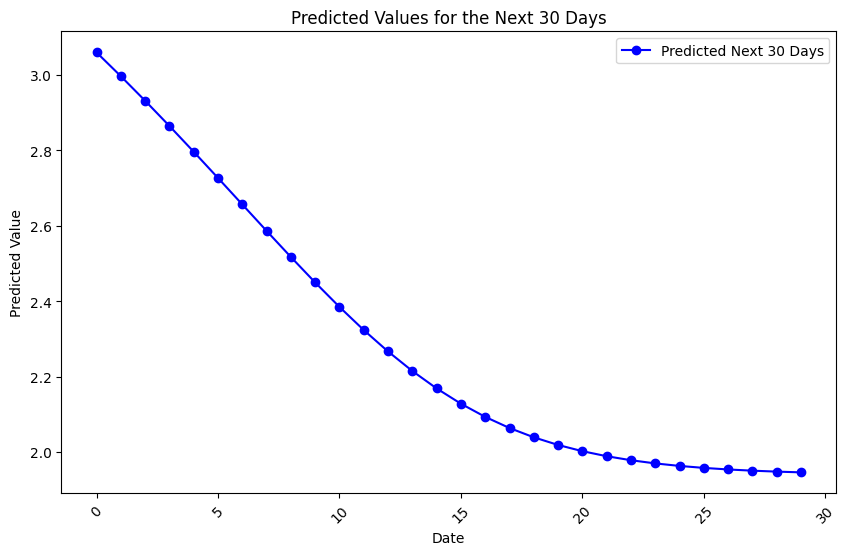

In [74]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [75]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [76]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    0.027547
dtype: float64
Testing MAPE: 0.00654301030969438
Testing MAE: 0.02415606737954358


In [77]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    0.027547
dtype: float64
Testing MAPE: 0.00654301030969438
Testing MAE: 0.02415606737954358


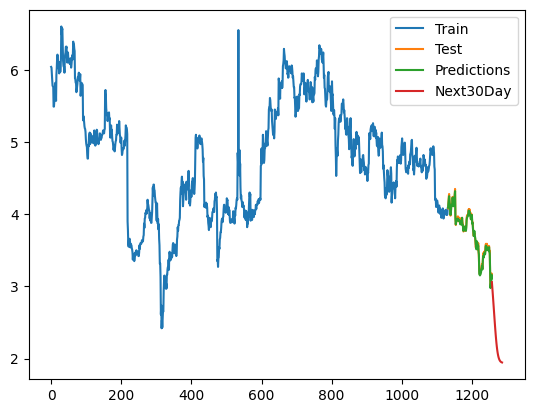

In [78]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()